# **온라인 화장품 Funnel분석**
---


## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 온라인 화장품 Funnel분석
```  

> **프로젝트유형**

```
▶ 온라인 화장품 구매이력 데이터 활용 Funnel 분석

```



## **문제상황 Introduction**
---

> **문제정의**

```
▶ 온라인 매출 증가의 정체기
```  

> **기대효과**

```
▶ 고객들의 구매 전환률 증가, 매출 증가
```

> **해결방안**

```
▶ 단계별 이탈률 분석, 이탈률이 높은 화장품 카테고리 탐색
```


> **데이터 살펴보기**


|Column|Description|
|:---|:---|
|event_time|이벤트가 발생한 시간|
|event_type|이벤트 유형: [view, cart, remove_from_cart, purchase] 중 하나|
|product_id|제품 ID|
|category_id|제품 카테고리 ID|
|category_code|의미 있는 카테고리 이름 (있는 경우)|
|brand|브랜드 이름 (소문자로, 있을 경우)|
|price|제품 가격|
|user_id|영구 사용자 ID|
|user_session|사용자 세션 ID|




In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/개인 프로젝트/11')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/개인 프로젝트/11'

In [ ]:
import pandas as pd
df = pd.read_csv('P_PJT11_DATA.csv')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5


## Process01
---
DATA 전처리 및 EDA

### DATA 전처리

---

In [ ]:
df.shape

(3533286, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3533286 entries, 0 to 3533285
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 242.6+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['event_time'].str.split(' ').str[0])
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,NaN,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,NaN,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,NaN,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,NaN,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,NaN,NaN,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01


In [ ]:
df['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3533286 entries, 0 to 3533285
Series name: Date
Non-Null Count    Dtype         
--------------    -----         
3533286 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 27.0 MB


In [ ]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    3474821
brand            1510289
price                  0
user_id                0
user_session         779
Date                   0
dtype: int64

In [ ]:
df = df.fillna('none')
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,none,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,none,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,none,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,none,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,none,none,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01


In [ ]:
df.describe()

,product_id,category_id,price,user_id,Date
count,3.533286e+06,3.533286e+06,3.533286e+06,3.533286e+06,3533286
mean,5.473054e+06,1.555023e+18,8.871856e+00,5.223318e+08,2019-12-14 08:53:29.843754496
min,3.752000e+03,1.487580e+18,-7.937000e+01,1.180452e+06,2019-12-01 00:00:00
25%,5.726191e+06,1.487580e+18,2.060000e+00,4.866830e+08,2019-12-07 00:00:00
50%,5.811429e+06,1.487580e+18,4.210000e+00,5.566496e+08,2019-12-14 00:00:00
75%,5.859462e+06,1.487580e+18,7.140000e+00,5.828019e+08,2019-12-21 00:00:00
max,5.917178e+06,2.235524e+18,3.277800e+02,5.954145e+08,2019-12-31 00:00:00
std,1.331331e+06,1.689262e+17,1.986474e+01,8.494819e+07,NaN


### DATA EDA

---

In [ ]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,none,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,none,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,none,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,none,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,none,none,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01


In [ ]:
df.event_type.unique()

array(['remove_from_cart', 'view', 'cart', 'purchase'], dtype=object)

In [ ]:
event = df.groupby('event_type')['event_time'].count().reset_index().sort_values('event_time', ascending=False).reset_index()
event = event.T
event

,0,1,2,3
index,3,0,2,1
event_type,view,cart,remove_from_cart,purchase
event_time,1728331,927124,664655,213176


In [ ]:
# 단계별 이탈률
print('view to cart drop', (1- event.iloc[2,1]/event.iloc[2,0])*100)
print('cart to purchase drop', (1- event.iloc[2,3]/event.iloc[2,1])*100)

view to cart drop 46.35726605609689
cart to purchase drop 77.00674343453518


<Axes: xlabel='event_type', ylabel='event_time'>

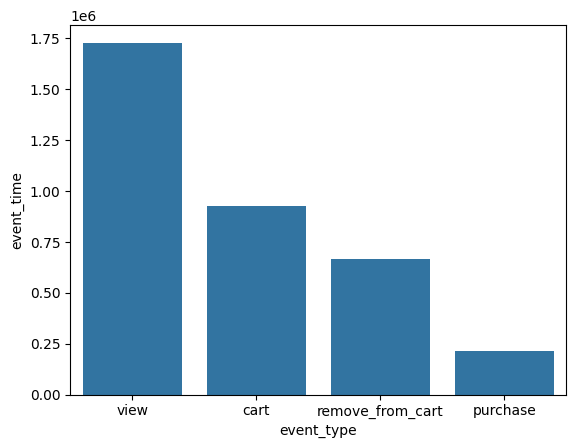

In [ ]:
import seaborn as sns
sns.barplot(df.groupby('event_type')['event_time'].count().reset_index().sort_values('event_time', ascending=False).reset_index(), x='event_type', y='event_time')

<Axes: xlabel='event_type', ylabel='price'>

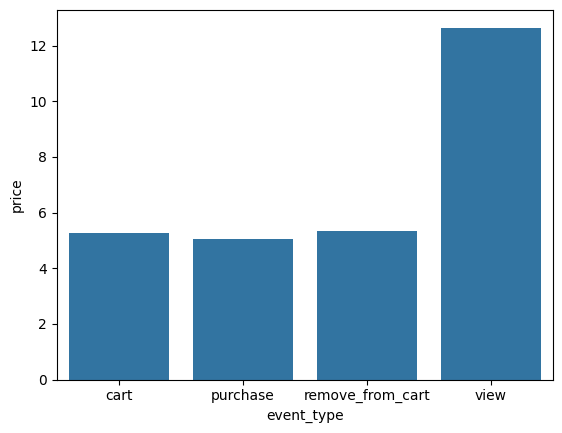

In [ ]:
sns.barplot(df.groupby('event_type')['price'].mean().reset_index(), x='event_type', y='price')

## Process02

---

### 이탈률 높은 카테고리 탐색

In [ ]:
id = df.groupby(['category_id', 'event_type'])['event_type'].count().reset_index(name='count')
idg = id[id['event_type'].isin(['cart', 'purchase'])]
idg.head(10)

,category_id,event_type,count
0,1487580004807082827,cart,3
2,1487580004832248652,cart,2385
3,1487580004832248652,purchase,469
6,1487580004857414477,cart,2571
7,1487580004857414477,purchase,468
10,1487580004882580302,cart,2886
11,1487580004882580302,purchase,616
14,1487580004916134735,cart,9322
15,1487580004916134735,purchase,2191
18,1487580004941300560,cart,21


In [ ]:
idg['cart'] = idg['count'].shift(1)
idg.head(20)

,category_id,event_type,count,cart
0,1487580004807082827,cart,3,NaN
2,1487580004832248652,cart,2385,3.0
3,1487580004832248652,purchase,469,2385.0
6,1487580004857414477,cart,2571,469.0
7,1487580004857414477,purchase,468,2571.0
10,1487580004882580302,cart,2886,468.0
11,1487580004882580302,purchase,616,2886.0
14,1487580004916134735,cart,9322,616.0
15,1487580004916134735,purchase,2191,9322.0
18,1487580004941300560,cart,21,2191.0


In [ ]:
idg2 = idg[idg['event_type']=='purchase']
idg2.head(10)

,category_id,event_type,count,cart
3,1487580004832248652,purchase,469,2385.0
7,1487580004857414477,purchase,468,2571.0
11,1487580004882580302,purchase,616,2886.0
15,1487580004916134735,purchase,2191,9322.0
19,1487580004941300560,purchase,1,21.0
26,1487580005008409427,purchase,479,2836.0
30,1487580005025186644,purchase,2,31.0
34,1487580005050352469,purchase,1570,7289.0
38,1487580005067129686,purchase,314,1811.0
42,1487580005092295511,purchase,6687,29181.0


In [ ]:
idg2['drop_ratio'] = round((1-idg2['count']/idg2['cart'])*100, 0)
idg2.head(10)

,category_id,event_type,count,cart,drop_ratio
3,1487580004832248652,purchase,469,2385.0,80.0
7,1487580004857414477,purchase,468,2571.0,82.0
11,1487580004882580302,purchase,616,2886.0,79.0
15,1487580004916134735,purchase,2191,9322.0,76.0
19,1487580004941300560,purchase,1,21.0,95.0
26,1487580005008409427,purchase,479,2836.0,83.0
30,1487580005025186644,purchase,2,31.0,94.0
34,1487580005050352469,purchase,1570,7289.0,78.0
38,1487580005067129686,purchase,314,1811.0,83.0
42,1487580005092295511,purchase,6687,29181.0,77.0


In [ ]:
drop_ratio = idg2.sort_values('drop_ratio', ascending=False)[['category_id', 'event_type', 'drop_ratio']].reset_index(drop=True)
drop_ratio.head(10)

,category_id,event_type,drop_ratio
0,1933364344720982871,purchase,96.0
1,1487580004941300560,purchase,95.0
2,1487580005025186644,purchase,94.0
3,1487580011031429216,purchase,92.0
4,2145935122136826354,purchase,92.0
5,1547480590851244887,purchase,91.0
6,2069804417665728971,purchase,91.0
7,2094448780651791052,purchase,91.0
8,1858245586344477369,purchase,91.0
9,1487580008128971748,purchase,90.0


In [ ]:
id2 = df.groupby(['category_id', 'event_type'])['event_type'].count().reset_index(name='count')
idg3 = id2[id2['event_type'].isin(['view', 'cart'])].sort_values(['category_id', 'event_type'], ascending=False)
idg3.head()

,category_id,event_type,count
1680,2235524499636224267,view,1141
1677,2235524499636224267,cart,241
1676,2235524494015856752,view,286
1673,2235524494015856752,cart,124
1672,2196456817758831535,view,695


In [ ]:
idg3['view'] = idg3['count'].shift(1)
idg3.head(30)

,category_id,event_type,count,view
1680,2235524499636224267,view,1141,NaN
1677,2235524499636224267,cart,241,1141.0
1676,2235524494015856752,view,286,241.0
1673,2235524494015856752,cart,124,286.0
1672,2196456817758831535,view,695,124.0
1669,2196456817758831535,cart,323,695.0
1668,2196456817641391019,view,4450,323.0
1665,2196456817641391019,cart,3139,4450.0
1664,2195085258339123402,view,57,3139.0
1661,2195085258339123402,cart,16,57.0


In [ ]:
idg4 = idg3[idg3['event_type']=='cart']
idg4.head(5)

,category_id,event_type,count,view
1677,2235524499636224267,cart,241,1141.0
1673,2235524494015856752,cart,124,286.0
1669,2196456817758831535,cart,323,695.0
1665,2196456817641391019,cart,3139,4450.0
1661,2195085258339123402,cart,16,57.0


In [ ]:
idg4['drop_ratio'] = round((1-idg4['count']/idg4['view'])*100, 0)
idg4.head(10)

,category_id,event_type,count,view,drop_ratio
1677,2235524499636224267,cart,241,1141.0,79.0
1673,2235524494015856752,cart,124,286.0,57.0
1669,2196456817758831535,cart,323,695.0,54.0
1665,2196456817641391019,cart,3139,4450.0,29.0
1661,2195085258339123402,cart,16,57.0,72.0
1657,2195085258272014535,cart,1016,1501.0,32.0
1653,2195085258179739843,cart,34,147.0,77.0
1649,2195085255176618020,cart,377,609.0,38.0
1645,2195085255117897760,cart,187,421.0,56.0
1641,2195085255034011676,cart,2655,4489.0,41.0


In [ ]:
drop_ratio2 = idg4.sort_values('drop_ratio', ascending=False)[['category_id', 'event_type', 'drop_ratio']].reset_index(drop=True)
drop_ratio2.head(10)

,category_id,event_type,drop_ratio
0,1487580013933887709,cart,99.0
1,2187686850687140020,cart,97.0
2,1547480590851244887,cart,95.0
3,1487580010695884882,cart,95.0
4,1487580012734316706,cart,94.0
5,1487580005343953762,cart,94.0
6,2022516588854378951,cart,94.0
7,1487580010360340546,cart,93.0
8,1487580008028308447,cart,93.0
9,1487580006300255120,cart,93.0


In [ ]:
print(drop_ratio.drop_ratio.mean())
print(drop_ratio2.drop_ratio.mean())

76.31632653061224
46.315


In [ ]:
# 뷰 -> 카트 이탈률, 카트 -> 구매 이탈률 85% 이상인 카테고리 리스트
high_ratio_drop_pur = drop_ratio[drop_ratio['drop_ratio']>=85]['category_id']
high_ratio_drop_cart = drop_ratio2[drop_ratio2['drop_ratio']>=85]['category_id']
print('뷰->카트 이탈률 85% 이상',high_ratio_drop_cart.head())
print('카트->구매 이탈률 85% 이상',high_ratio_drop_pur.head())

뷰->카트 이탈률 80% 이상 0    1487580013933887709
1    2187686850687140020
2    1547480590851244887
3    1487580010695884882
4    1487580012734316706
Name: category_id, dtype: int64
카트->구매 이탈률 80% 이상 0    1933364344720982871
1    1487580004941300560
2    1487580005025186644
3    1487580011031429216
4    2145935122136826354
Name: category_id, dtype: int64


In [ ]:
# 가격이 비싼 상품 카트에 담는 과정에서 어느정도 걸러짐
df[df['category_id'].isin(high_ratio_drop_cart)]['price'].mean()

57.22298319044386

In [ ]:
# 카트->구매결정은 가격 외 다른 요소에 영향을 받음
# 비슷한 가격의 다른 제품과 비교 후 탈락
df[df['category_id'].isin(high_ratio_drop_pur)]['price'].mean()

20.25300885634321

### 평균 쇼핑 시간


In [ ]:
time1 = df.sort_values(['user_session', 'event_time']).drop_duplicates('user_session')
time2 = df.sort_values(['user_session', 'event_time'], ascending=False).drop_duplicates('user_session').sort_values('user_session')

In [ ]:
time1 = time1[['event_time', 'user_session']]
time2 = time2[['event_time', 'user_session']]

In [ ]:
time3 = pd.merge(time1, time2, on='user_session', how='left')
time3.head()

,event_time_x,user_session,event_time_y
0,2019-12-20 20:37:29 UTC,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2019-12-20 20:50:05 UTC
1,2019-12-18 06:48:39 UTC,00002b0e-d7f7-454e-8386-431c4021a9f6,2019-12-18 07:13:24 UTC
2,2019-12-08 09:17:32 UTC,00002f36-401d-4bc5-bac6-1a683f52ac2b,2019-12-08 09:17:32 UTC
3,2019-12-29 20:26:08 UTC,000035aa-dc4c-4703-aa6e-042ce96c6aef,2019-12-29 20:26:08 UTC
4,2019-12-16 18:49:00 UTC,00004e6a-00f4-49e0-8ec8-f688a2e61250,2019-12-16 19:01:29 UTC


In [ ]:
time3['event_time_x'] = pd.to_datetime(time3['event_time_x'])
time3['event_time_y'] = pd.to_datetime(time3['event_time_y'])
time3['stay_time'] = time3['event_time_y']-time3['event_time_x']
time3.head()

,event_time_x,user_session,event_time_y,stay_time
0,2019-12-20 20:37:29+00:00,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,2019-12-20 20:50:05+00:00,0 days 00:12:36
1,2019-12-18 06:48:39+00:00,00002b0e-d7f7-454e-8386-431c4021a9f6,2019-12-18 07:13:24+00:00,0 days 00:24:45
2,2019-12-08 09:17:32+00:00,00002f36-401d-4bc5-bac6-1a683f52ac2b,2019-12-08 09:17:32+00:00,0 days 00:00:00
3,2019-12-29 20:26:08+00:00,000035aa-dc4c-4703-aa6e-042ce96c6aef,2019-12-29 20:26:08+00:00,0 days 00:00:00
4,2019-12-16 18:49:00+00:00,00004e6a-00f4-49e0-8ec8-f688a2e61250,2019-12-16 19:01:29+00:00,0 days 00:12:29


In [ ]:
time3['stay_time'] = time3['stay_time'].astype(str).str.split('days ').str[1]
time3= time3[time3['stay_time']!= '00:00:00'][['user_session', 'stay_time']]
time3.head()

,user_session,stay_time
0,00001aa1-7ee6-4d8c-81ff-bd5ce1dd1d6e,00:12:36
1,00002b0e-d7f7-454e-8386-431c4021a9f6,00:24:45
4,00004e6a-00f4-49e0-8ec8-f688a2e61250,00:12:29
5,000066fc-499b-4ad9-8e42-214d64ce9be1,00:03:50
6,00007c91-c17d-4798-bbc7-107f86e8adcc,00:00:46


In [ ]:
# 세션당 평균 머무는 시간 42분 30초
time3['stay_time'] = pd.to_datetime(time3['stay_time'])
time3['stay_time'].mean()

Timestamp('2024-06-17 00:42:31.741963776')

In [ ]:
# 구매로 이어진 쇼핑의 평균시간
purc1 = df.sort_values(['user_session', 'event_time']).drop_duplicates('user_session')
purc2 = df[df['event_type']=='purchase'].sort_values(['user_session', 'event_time'], ascending=False).drop_duplicates('user_session').sort_values('user_session')
purc1 = purc1[['event_time', 'user_session']]
purc2 = purc2[['event_time', 'user_session']]
purc3 = pd.merge(purc2, purc1, on='user_session', how='left')
purc3.head()

,event_time_x,user_session,event_time_y
0,2019-12-14 09:01:26 UTC,000277a9-30da-4bb2-b5ad-96ef24483af8,2019-12-14 08:58:46 UTC
1,2019-12-29 06:23:22 UTC,000289fb-c2fe-4d96-81f2-d44c09249aec,2019-12-29 06:19:12 UTC
2,2019-12-13 21:55:34 UTC,0003e897-d517-4f0b-8917-416a0aa59bcb,2019-12-13 21:49:21 UTC
3,2019-12-13 11:29:57 UTC,0008092e-18f9-4641-a853-ee11a9967df7,2019-12-13 11:20:18 UTC
4,2019-12-03 20:23:44 UTC,000dad5b-9b3b-4070-b3d6-a828b6670655,2019-12-03 19:44:26 UTC


In [ ]:
# 구매 평균시간 45분 20초 -> 평균 소핑시간에 비해 3분 더 길다.
purc3['event_time_x'] = pd.to_datetime(purc3['event_time_x'])
purc3['event_time_y'] = pd.to_datetime(purc3['event_time_y'])
purc3['stay_time'] = purc3['event_time_y']-purc3['event_time_x']
purc3['stay_time'] = purc3['stay_time'].astype(str).str.split('days ').str[1]
purc3= purc3[purc3['stay_time']!= '00:00:00'][['user_session', 'stay_time']]
purc3['stay_time'] = pd.to_datetime(time3['stay_time'])
purc3['stay_time'].mean()

Timestamp('2024-06-17 00:45:23.985107456')

### 요일별 / 평일/주말별 사용량

In [ ]:
df['weekday'] = df['Date'].dt.day_of_week
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,Date,weekday
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,none,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,2019-12-01,6
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,none,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,2019-12-01,6
2,2019-12-01 00:00:02 UTC,cart,4958,1487580009471148064,none,runail,1.19,494077766,c99a50e8-2fac-4c4d-89ec-41c05f114554,2019-12-01,6
3,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,none,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,2019-12-01,6
4,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,none,none,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,2019-12-01,6


In [ ]:
df[df['weekday']<=4]['user_session'].nunique()/5

122756.6

In [ ]:
df[df['weekday']>=5]['user_session'].nunique()/2

114961.0

In [ ]:
# 주말보다는 평일, 요일로는 월,화,일요일 방문수가 가장 많음
# 주말이 다가올수록 방문수 하락
df.groupby('weekday')['user_session'].nunique()

weekday
0    147307
1    132358
2    121867
3    114332
4    105280
5     98529
6    132532
Name: user_session, dtype: int64

## Process03
---

### 단계별 이탈률




<Axes: xlabel='event_type', ylabel='event_time'>

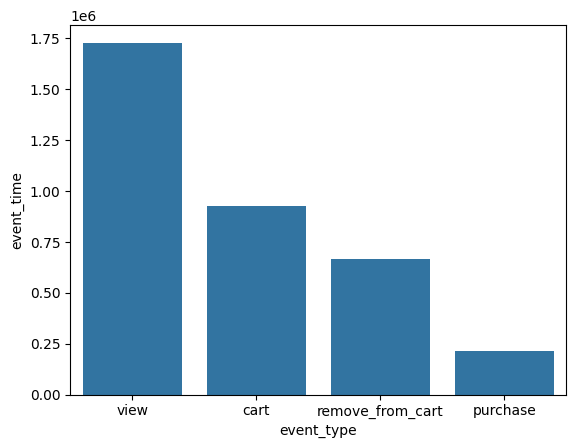

In [ ]:
sns.barplot(df.groupby('event_type')['event_time'].count().reset_index().sort_values('event_time', ascending=False).reset_index(), x='event_type', y='event_time')

In [ ]:
# 단계별 이탈률
print('view to cart drop', (1- event.iloc[2,1]/event.iloc[2,0])*100)
print('cart to purchase drop', (1- event.iloc[2,3]/event.iloc[2,1])*100)

view to cart drop 46.35726605609689
cart to purchase drop 77.00674343453518


### 요일별 사용량

<Axes: xlabel='weekday', ylabel='view'>

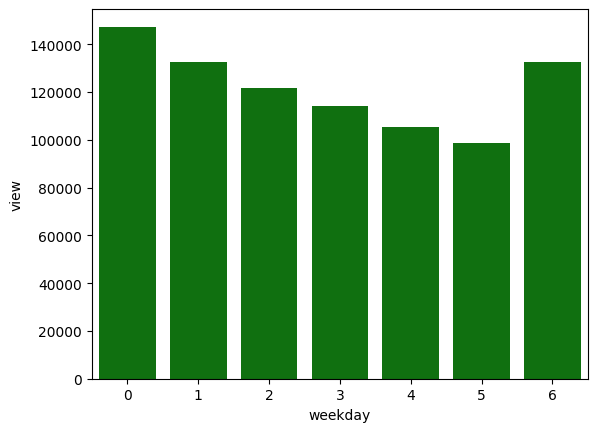

In [ ]:
sns.barplot(df.groupby('weekday')['user_session'].nunique().reset_index(name='view'), x= 'weekday', y='view', color='g')

### 단계별 이탈률이 높은 카테고리 리스트

In [ ]:
# 높은 이탈률 카테고리
high_ratio_drop_pur = drop_ratio[drop_ratio['drop_ratio']>=85]['category_id']
high_ratio_drop_cart = drop_ratio2[drop_ratio2['drop_ratio']>=85]['category_id']
print('뷰->카트 이탈률 85% 이상',high_ratio_drop_cart.head())
print('카트->구매 이탈률 85% 이상',high_ratio_drop_pur.head())

뷰->카트 이탈률 85% 이상 0    1487580013933887709
1    2187686850687140020
2    1547480590851244887
3    1487580010695884882
4    1487580012734316706
Name: category_id, dtype: int64
카트->구매 이탈률 85% 이상 0    1933364344720982871
1    1487580004941300560
2    1487580005025186644
3    1487580011031429216
4    2145935122136826354
Name: category_id, dtype: int64
